# Feature Summary
### Students Habit Performance

`student_id`: Unique ID

`age`: Age of students

`gender`: Male/Female/Others

`study_hours_per_day`: AVG.daily study time

`social_media_hours`: Daily social media time

`nextflix_hours`: Avg. daily Netflix/binging time

`part_time_job`: Yes/No

`attendance_percentage`: Class attendance (0–100%)

`sleep_hours`: Avg. daily sleep

`diet_quality`: Poor/Fair/Good  

`exercise_frequency`: Time per weeks

`parental_education_level`: High school, Bachelor, others

`internet_quality	`: Good, Poor, Average, Other

`mental_health_rating	`: Scale 1-10

`extracurricular_participation	`: Yes/No

`exam_score`: Final exam score (0–100)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
# Load the dataset
students_habit = pd.read_csv('/Users/vananhduy/PycharmProjects/DSR_PROJECT_SU25/student_habits_performance.csv')


# EDA


In [3]:
students_habit.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [4]:
# Print info
print(students_habit.info())

# check for missing values
print('\nCheck for missing values:')
print(students_habit.isnull().sum())

# check for duplicate values
print('\nCheck for duplicate value:')
print(students_habit.duplicated().value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
#Filling missing values
students_habit['parental_education_level'] = students_habit['parental_education_level'].fillna(students_habit['parental_education_level'].mode()[0])

In [6]:
# check for missing values
print('\nCheck for missing values:')
print(students_habit.isnull().sum())


Check for missing values:
student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


In [7]:
#cat_col: lấy cột object
cat_col = students_habit.select_dtypes(include='object').columns
cat_col = [col for col in cat_col]
cat_col.remove('student_id')
cat_col

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

Visualize Distribution

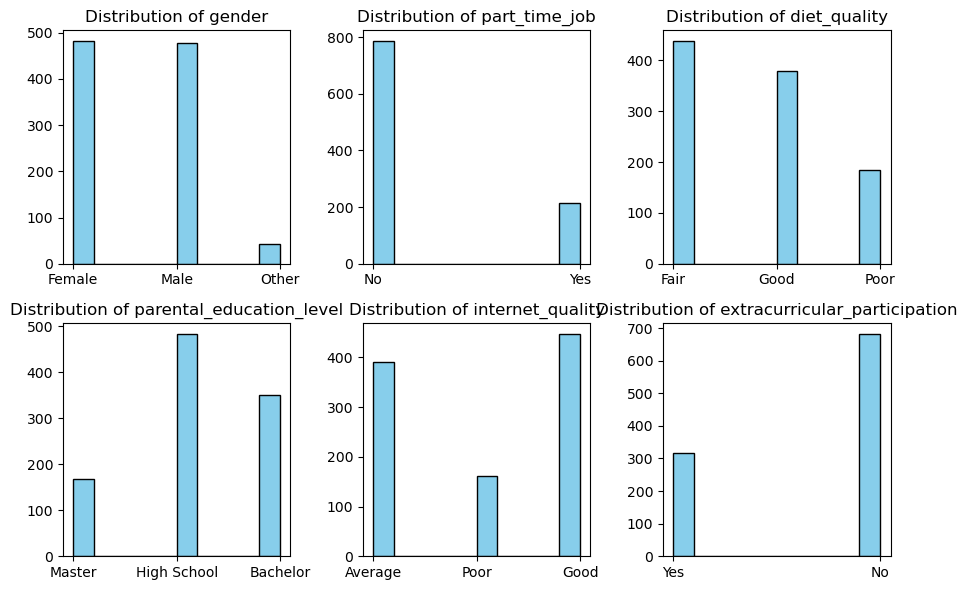

In [8]:
plt.figure(figsize=(9,6))
for i in range(6):
    plt.subplot(2, 3, i+1)  # subplot index starts at 1
    plt.hist(students_habit[cat_col[i]], color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {cat_col[i]}')

plt.tight_layout()
plt.show()  # show all plots at once

In [9]:
num_col = students_habit.select_dtypes(exclude='object').columns
num_col = [col for col in num_col]
num_col

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score']

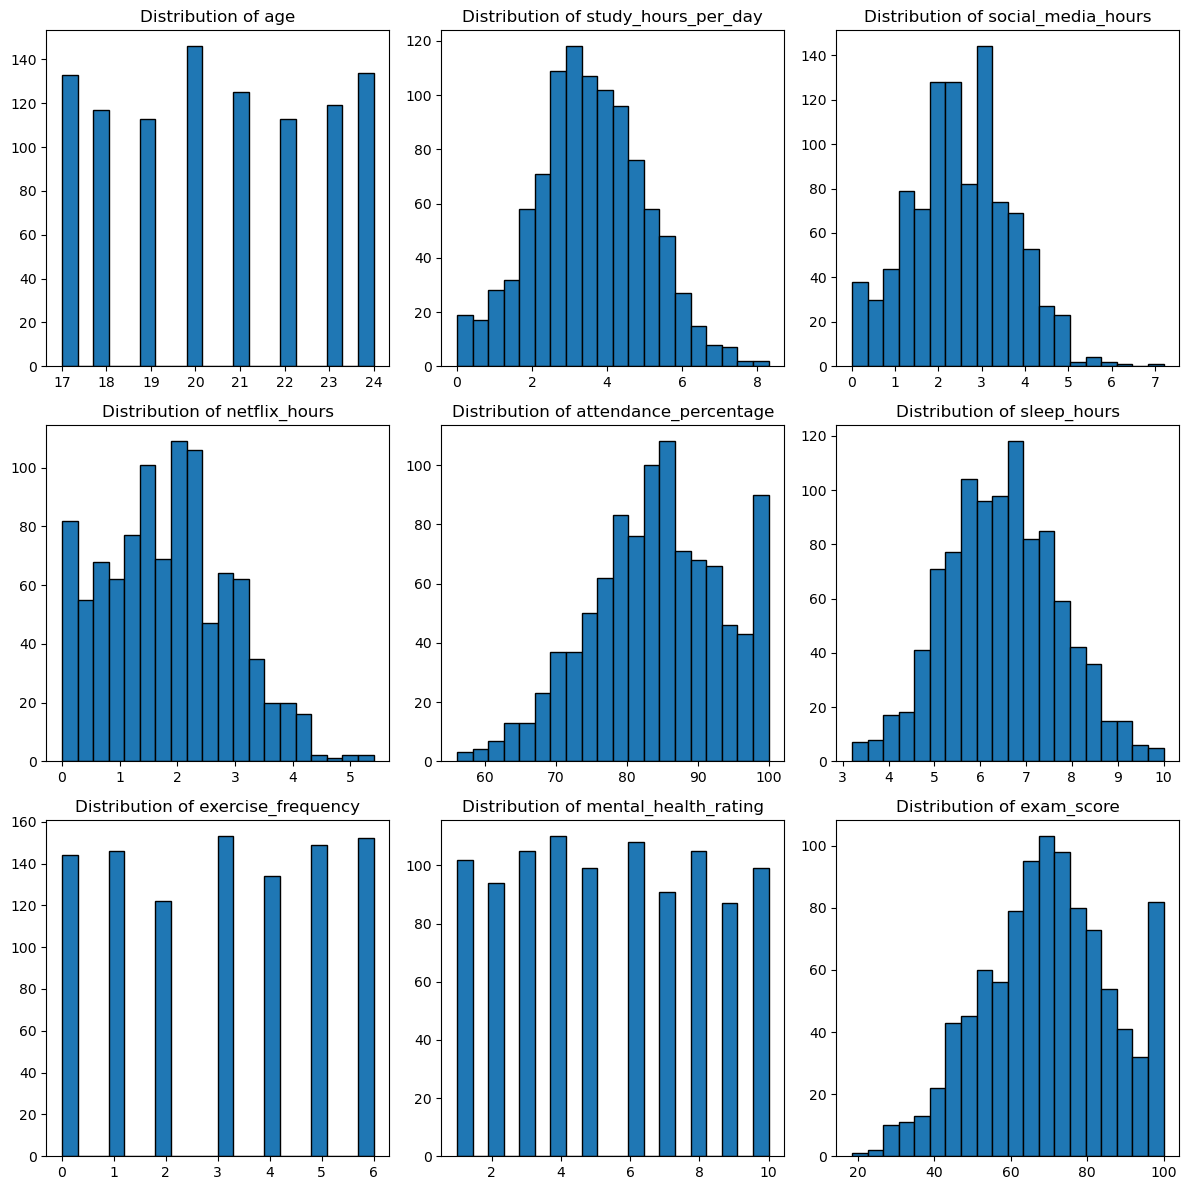

In [10]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3, 3, i+1)  # subplot index starts at 1
    plt.hist(students_habit[num_col[i]],bins=20, edgecolor='black')
    plt.title(f'Distribution of {num_col[i]}')

plt.tight_layout()
plt.show()  # show all plots at once


Loại bỏ cột "Student_id"


In [11]:
students_habit2 = students_habit.drop('student_id', axis=1)
students_habit2.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [12]:
students_habit[cat_col].describe()

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,1000,1000
unique,3,2,3,3,3,2
top,Female,No,Fair,High School,Good,No
freq,481,785,437,483,447,682


Correlation Map

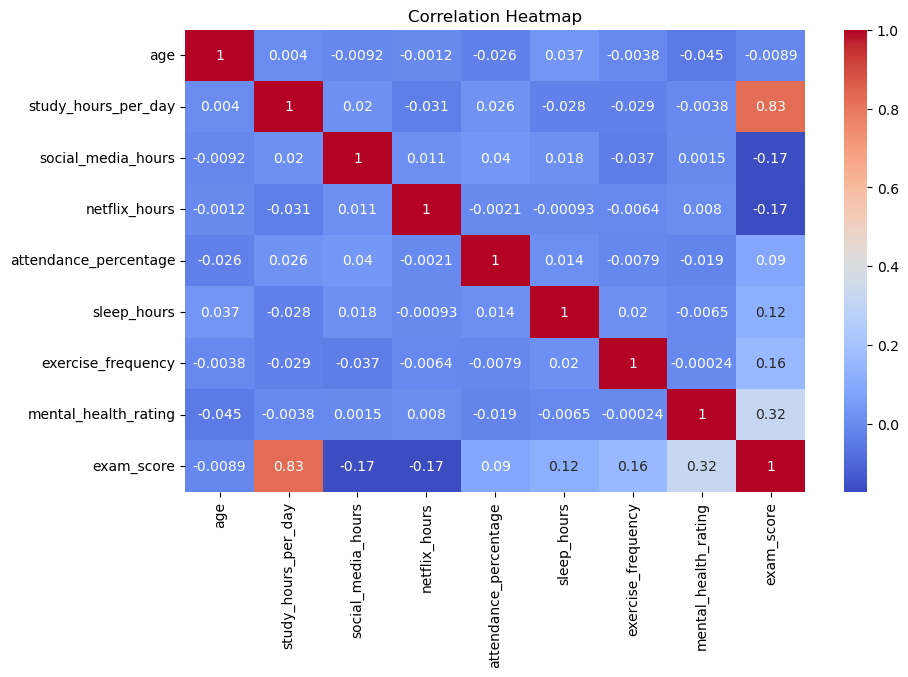

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(students_habit.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Pairplot for Top Correlations

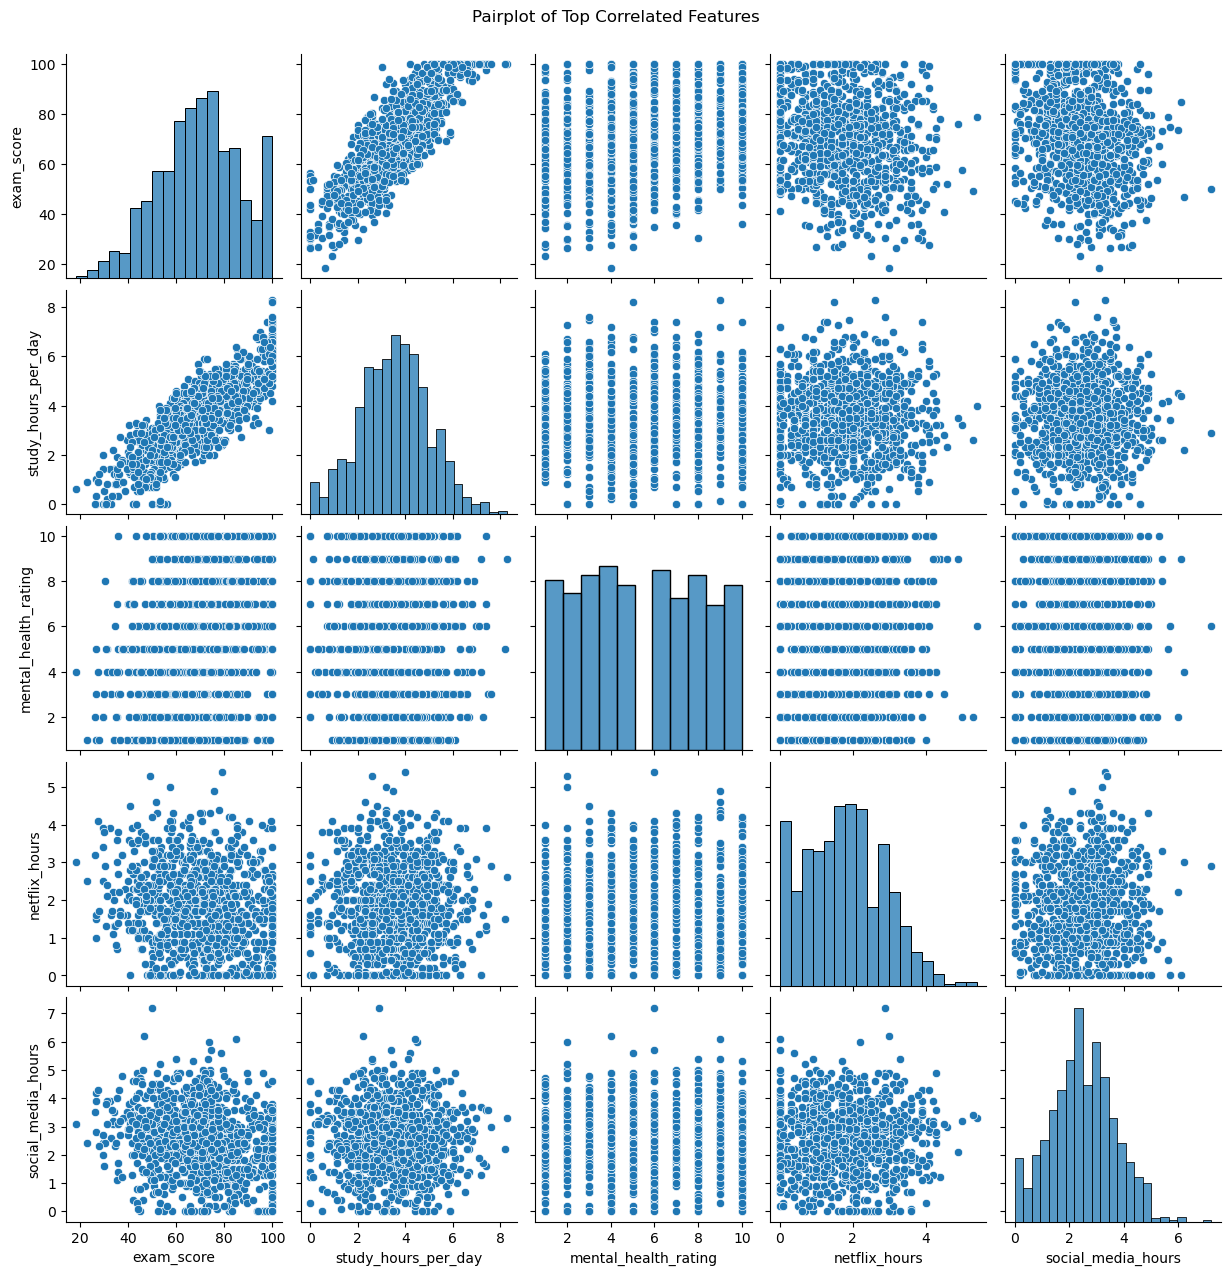

In [14]:
# Select top correlated features
corr_matrix = students_habit.corr(numeric_only=True)
top_corr_features = corr_matrix['exam_score'].abs().sort_values(ascending=False).head(5).index

# Pairplot
sns.pairplot(students_habit[top_corr_features])
plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
plt.show()


Boxplots for Categorical Variables

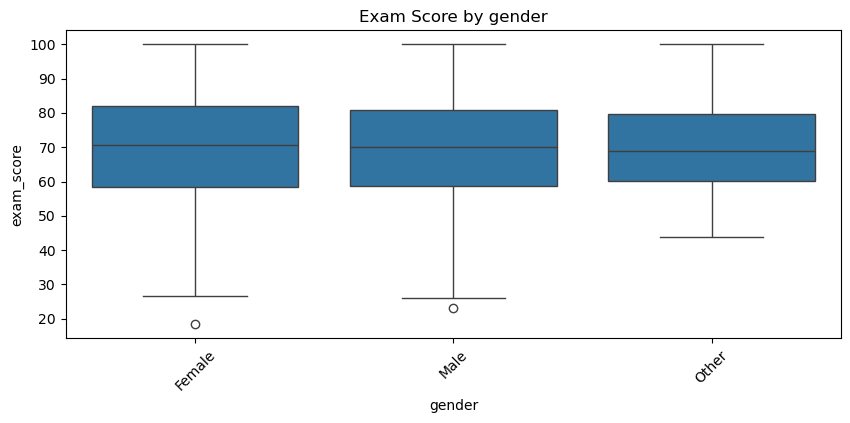

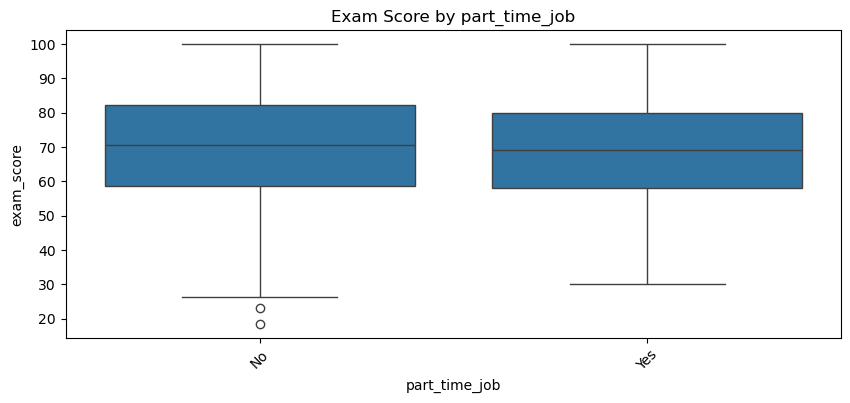

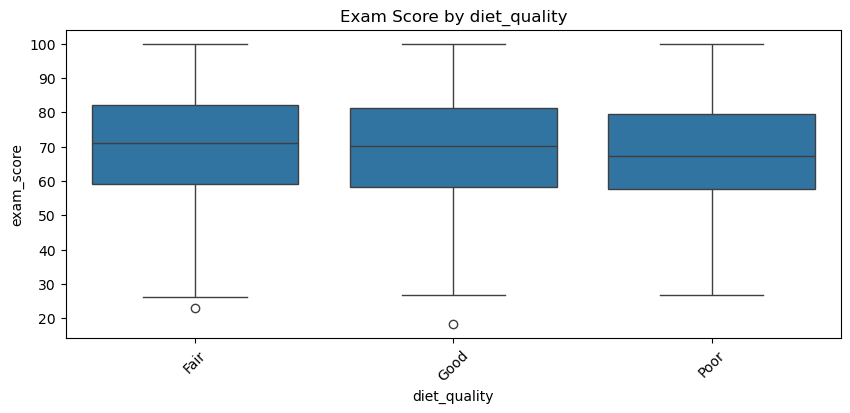

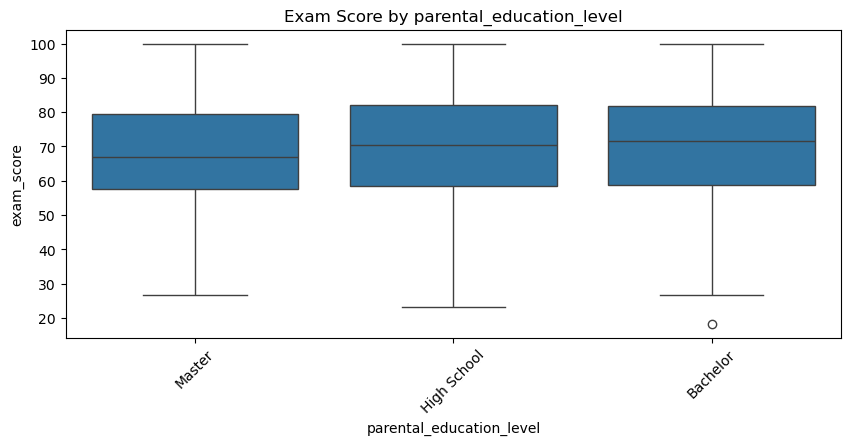

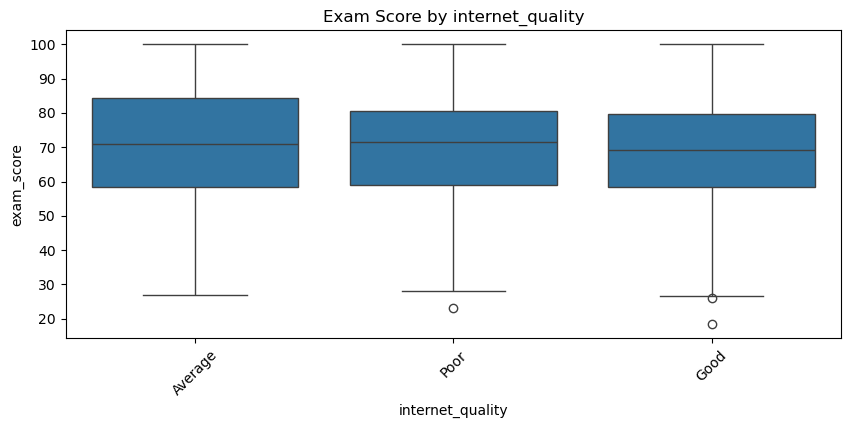

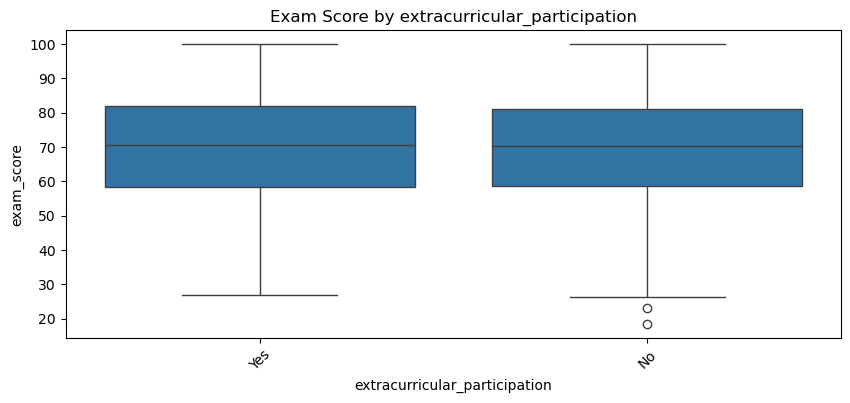

In [15]:
# categorical_columns = students_habit.select_dtypes(include='object').columns

for col in cat_col:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=col, y='exam_score', data=students_habit)
    plt.xticks(rotation=45)
    plt.title(f'Exam Score by {col}')
    plt.show()


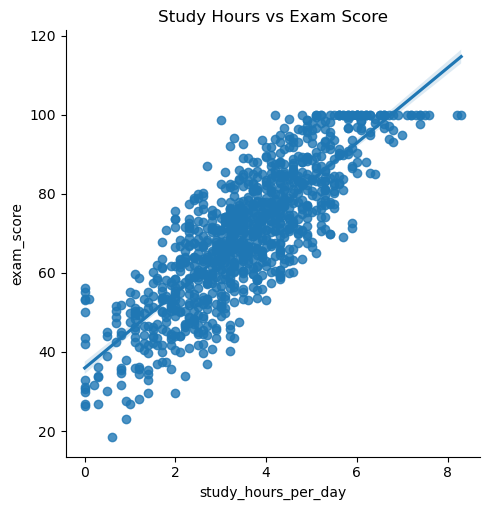

In [16]:
# Example: Replace 'study_hours' with your actual column
sns.lmplot(x='study_hours_per_day', y='exam_score', data=students_habit)
plt.title('Study Hours vs Exam Score')
plt.show()


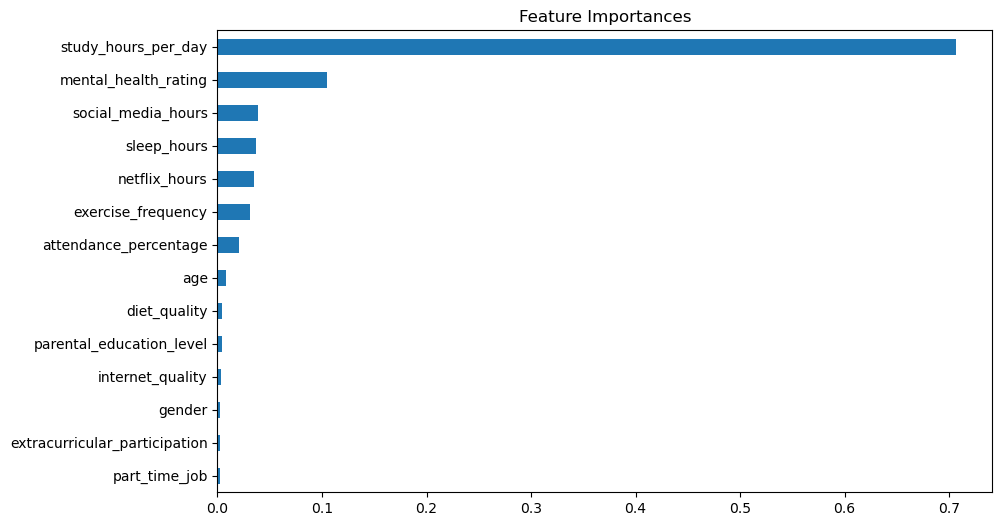

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Encode categorical features

for col in cat_col:
    students_habit2[col] = LabelEncoder().fit_transform(students_habit2[col])

X = students_habit2.drop('exam_score', axis=1)
y = students_habit2['exam_score']

model = RandomForestRegressor()
model.fit(X, y)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), title='Feature Importances')
plt.show()


In [18]:
students_habit2

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2
1,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0
2,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3
3,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8
4,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,0,2.6,0.5,1.6,0,77.0,7.5,0,2,1,1,6,1,76.1
996,17,0,2.9,1.0,2.4,1,86.0,6.8,2,1,1,0,6,1,65.9
997,20,1,3.0,2.6,1.3,0,61.9,6.5,1,5,0,1,9,1,64.4
998,24,1,5.4,4.1,1.1,1,100.0,7.6,0,0,0,0,1,0,69.7
